In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import streamlit as st

In [2]:
# membuka file json
f = open('kode_negara_lengkap.json')
f_json = json.load(f)

In [3]:
# membuka file csv
df_csv = pd.read_csv('produksi_minyak_mentah.csv')
df_json = pd.DataFrame.from_dict(f_json, orient = 'columns')

# menampilkan file json dan csv
print(df_json)
print(df_csv)

                  name alpha-2 alpha-3 country-code     iso_3166-2   region  \
0          Afghanistan      AF     AFG          004  ISO 3166-2:AF     Asia   
1       Ã…land Islands      AX     ALA          248  ISO 3166-2:AX   Europe   
2              Albania      AL     ALB          008  ISO 3166-2:AL   Europe   
3              Algeria      DZ     DZA          012  ISO 3166-2:DZ   Africa   
4       American Samoa      AS     ASM          016  ISO 3166-2:AS  Oceania   
..                 ...     ...     ...          ...            ...      ...   
244  Wallis and Futuna      WF     WLF          876  ISO 3166-2:WF  Oceania   
245     Western Sahara      EH     ESH          732  ISO 3166-2:EH   Africa   
246              Yemen      YE     YEM          887  ISO 3166-2:YE     Asia   
247             Zambia      ZM     ZMB          894  ISO 3166-2:ZM   Africa   
248           Zimbabwe      ZW     ZWE          716  ISO 3166-2:ZW   Africa   

             sub-region intermediate-region region-

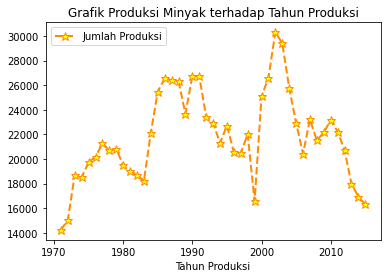

In [7]:
# NOMOR 1
# mencari list kode sampah (kode negara yang tidak digunakan)
kode_sampah = []
for i in list(df_csv['kode_negara']): 
    if i not in list (df_json['alpha-3']): 
        kode_sampah.append(i)

# membuat list kode negara baru (kode negara tanpa kode sampah)
kode_negara_new = []
for i in list(df_csv['kode_negara']): 
    if i not in kode_sampah: 
        kode_negara_new.append(i)

for i in kode_sampah: 
    df_csv = df_csv[df_csv.kode_negara != i]

for i in list(df_csv['kode_negara']): 
    kode_negara_new.append(i)

# membuat list nama negara
nama_negara = []
for i in range(len(kode_negara_new)):
    for j in range(len(list(df_json['alpha-3']))):
        if kode_negara_new[i] == list(df_json['alpha-3'])[j]:
            nama_negara.append(list(df_json['name'])[j])

# membuat list jumlah produksi
produksi = []
for i in range(len(list(df_csv['produksi']))): 
    produksi.append(list(df_csv['produksi'])[i])

# membuat list tahun produksi
tahun = []
for i in range(len(list(df_csv['tahun']))): 
    tahun.append(list(df_csv['tahun'])[i])

# membuat data frame baru yaitu kumpulan list nama negara, jumlah produksi, dan tahun produksi
df_new = pd.DataFrame(list(zip(nama_negara, produksi, tahun)), columns=['Nama Negara','Jumlah Produksi','Tahun Produksi'])

# user memasukkan nama negara yang ingin dianalisa
N = st.text_input('Masukkan nama negara: ')

# menampilkan grafik jumlah produksi minyak terhadap tahun produksi
df_output_a = df_new.loc[df_new['Nama Negara'] == N]
df_output_a.plot(x = 'Tahun Produksi', y = 'Jumlah Produksi', title = 'Grafik Produksi Minyak terhadap Tahun Produksi', color = 'darkorange', linestyle = 'dashed', linewidth = 2, marker='*', markerfacecolor = 'yellow', markersize = 9)
grafik1 = plt.show()
st.pyplot(grafik1)

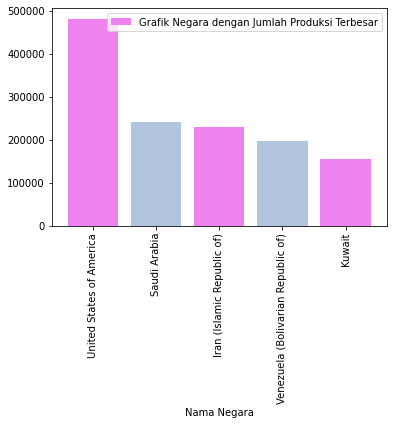

In [8]:
# NOMOR 2
# user menginput tahun produksi dan jumlah banyak negara dengan produksi terbesar yang diinginkan
T = st.number_input('Masukkan tahun produksi: ')
B_2 = st.number_input('Masukkan jumlah banyak negara dengan produksi terbesar: ')

# membuat data frame baru berisi tahun produksi
df_new_b = df_new.loc[df_new['Tahun Produksi'] == T]

# mengurutkan nilai jumlah produksi dari terbesar ke terkecil
df_urut_b = df_new_b.sort_values(by = ['Jumlah Produksi'], ascending = False)

# menampilkan grafik negara dengan jumlah produksi terbesar
df_output_b = df_urut_b[:B_2]
df_output_b.plot.bar(x = 'Nama Negara', y = 'Jumlah Produksi', label = 'Grafik Negara dengan Jumlah Produksi Terbesar', width = 0.8, color = ['violet', 'lightsteelblue'])
grafik2 = plt.show()
st.pyplot(grafik2)

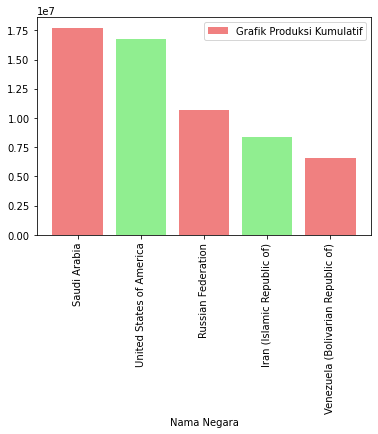

In [9]:
# NOMOR 3
# membuat data frame baru
kode_negara_unik = []
kumulatif = []

# mencari list nama negara unik
for i in list(df_new['Nama Negara']):
    if i not in kode_negara_unik:
        kode_negara_unik.append(i)

# mencari list kumulatif
for i in kode_negara_unik:
    df_new_c = df_new.loc[df_new['Nama Negara'] == i, 'Jumlah Produksi'].sum()
    kumulatif.append(df_new_c)

# membuat data frame baru berisi nama negara dan jumlah produksi kumulatif
df_kumulatif = pd.DataFrame(list(zip(kode_negara_unik, kumulatif)), columns = ['Nama Negara', 'Kumulatif'])

# mengurutkan nilai kumulatif dari terbesar ke terkecil
df_kumulatif = df_kumulatif.sort_values(by = ['Kumulatif'], ascending = False)

# user menginput banyak negara dengan produksi kumulatif terbesar yang diinginkan
B_3 = st.number_input('Masukkan jumlah banyak negara dengan produksi kumulatif terbesar: ')

# menampilkan grafik negara dengan jumlah produksi kumulatif terbesar
df_output_c = df_kumulatif[:B_3]
df_output_c.plot.bar(x = 'Nama Negara', y = 'Kumulatif', label = 'Grafik Produksi Kumulatif', width = 0.8, color = ['lightcoral', 'lightgreen'])
grafik3 = plt.show()
st.pyplot(grafik3)

In [10]:
# NOMOR 4
# membuat list region
region = []
for i in range(len(kode_negara_new)):
    for j in range(len(list(df_json['alpha-3']))):
        if list(df_json['alpha-3'])[j] == kode_negara_new[i]:
            region.append(list(df_json['region'])[j])

# membuat list sub-region
subregion = []
for i in range(len(kode_negara_new)):
    for j in range(len(list(df_json['alpha-3']))):
        if list(df_json['alpha-3'])[j] == kode_negara_new[i]:
            subregion.append(list(df_json['sub-region'])[j])

# membuat data frame baru berisi nama negara, kode negara, tahun produksi, jumlah produksi, region negara, dan subregion negara
df_new_d = pd.DataFrame(list(zip(nama_negara, kode_negara_new, tahun, produksi, region, subregion)), columns = ['Nama Negara','Kode Negara', 'Tahun', 'Produksi', 'Region', 'Sub-Region'])

# TERBESAR!!!
# TAHUN T_4
# user menginput
T_4 = st.number_input('Masukkan tahun produksi: ')
df_d_T_4 = df_new_d.loc[df_new_d['Tahun'] == T_4]

# mengurutkan
df_sort_d_T_4 = df_d_T_4.sort_values(by = ['Produksi'], ascending = False)

# memunculkan
nama_negara_output_T_4 = df_sort_d_T_4[:1].iloc[0]['Nama Negara']
kode_negara_new_output_T_4 = df_sort_d_T_4[:1].iloc[0]['Kode Negara']
region_output_T_4 = df_sort_d_T_4[:1].iloc[0]['Region']
subregion_output_T_4 = df_sort_d_T_4[:1].iloc[0]['Sub-Region']
produksi_output_T_4 = df_sort_d_T_4[:1].iloc[0]['Produksi']

# menampilkan negara yang memiliki jumlah produksi minyak terbesar pada tahun T
st.subheader('Negara yang memiliki jumlah produksi minyak terbesar pada tahun {} adalah:'.format(T_4))
st.write('''{}
{}
Region: {}
Sub-Region: {}
Jumlah Produksi: {}
'''.format(nama_negara_output_T_4, kode_negara_new_output_T_4, region_output_T_4, subregion_output_T_4, produksi_output_T_4))

# KESELURUHAN TAHUN
# mengurutkan
df_sort_d = df_new_d.sort_values(by = ['Produksi'], ascending = False)

#memunculkan
tahun_output = df_sort_d[:1].iloc[0]['Tahun']
nama_negara_output = df_sort_d[:1].iloc[0]['Nama Negara']
kode_negara_new_output = df_sort_d[:1].iloc[0]['Kode Negara']
region_output = df_sort_d[:1].iloc[0]['Region']
subregion_output = df_sort_d[:1].iloc[0]['Sub-Region']
produksi_output = df_sort_d[:1].iloc[0]['Produksi']

# menampilkan negara yang memiliki jumlah produksi minyak terbesar pada seluruh tahun
st.subheader('Negara yang memiliki jumlah produksi minyak terbesar pada tahun {} adalah:'.format(tahun_output))
st.write('''{}
{}
Region: {}
Sub-Region: {}
Jumlah Produksi: {}
'''.format(nama_negara_output, kode_negara_new_output, region_output, subregion_output, produksi_output))

# TERKECIL!!!
# TAHUN T_4
df_d_T_4 = df_new_d.loc[df_new_d['Tahun'] == T_4]

# mengurutkan hasil produksi
df_new_d_min = df_d_T_4[df_d_T_4.Produksi != 0]
df_sort_d_T_4_min = df_new_d_min.sort_values(by = ['Produksi'], ascending = True)

# memunculkan
nama_negara_output_T_4_min = df_sort_d_T_4_min[:1].iloc[0]['Nama Negara']
kode_negara_new_output_T_4_min = df_sort_d_T_4_min[:1].iloc[0]['Kode Negara']
region_output_T_4_min = df_sort_d_T_4_min[:1].iloc[0]['Region']
subregion_output_T_4_min = df_sort_d_T_4_min[:1].iloc[0]['Sub-Region']
produksi_output_T_4_min = df_sort_d_T_4_min[:1].iloc[0]['Produksi']

# menampilkan negara yang memiliki jumlah produksi minyak terkecil pada tahun T
st.subheader('Negara yang memiliki jumlah produksi minyak terkecil pada tahun {} adalah:'.format(T_4))
st.write('''{}
{}
Region: {}
Sub-Region: {}
Jumlah Produksi: {}
'''.format(nama_negara_output_T_4_min, kode_negara_new_output_T_4_min, region_output_T_4_min, subregion_output_T_4_min, produksi_output_T_4_min))

# KESELURUHAN TAHUN
# mengurutkan hasil produksi
df_new_d_min = df_new_d[df_new_d.Produksi != 0]
df_sort_d_min = df_new_d_min.sort_values(by = ['Produksi'], ascending = True)

# memunculkan
tahun_output_min = df_sort_d_min[:1].iloc[0]['Tahun']
nama_negara_output_min = df_sort_d_min[:1].iloc[0]['Nama Negara']
kode_negara_new_output_min = df_sort_d_min[:1].iloc[0]['Kode Negara']
region_output_min = df_sort_d_min[:1].iloc[0]['Region']
subregion_output_min = df_sort_d_min[:1].iloc[0]['Sub-Region']
produksi_output_min = df_sort_d_min[:1].iloc[0]['Produksi']

# menampilkan negara yang memiliki jumlah produksi minyak terkecil pada seluruh tahun
st.subheader('Negara yang memiliki jumlah produksi minyak terkecil pada tahun {} adalah:'.format(tahun_output_min))
st.write('''{}
{}
Region: {}
Sub-Region: {}
Jumlah Produksi: {}
'''.format(nama_negara_output_min, kode_negara_new_output_min, region_output_min, subregion_output_min, produksi_output_min))

# PRODUKSI NOL!!!
# TAHUN T_4
df_produksi0_T_4 = df_new_d.loc[df_new_d['Tahun'] == T_4]
df_produksii0_T_4 = df_produksi0_T_4[df_produksi0_T_4.Produksi == 0]
negara0_T_4 = []
region0_T_4 = []
subregion0_T_4 = []

for i in range(len(df_produksii0_T_4)):
    for j in range(len(df_json)):
        if list(df_produksii0_T_4['Kode Negara'])[i] == list(df_json['alpha-3'])[j]:
            negara0_T_4.append(list(df_json['name'])[j])
            region0_T_4.append(list(df_json['region'])[j])
            subregion0_T_4.append(list(df_json['sub-region'])[j])

st.dataframe(df_produksii0_T_4)

# KESELURUHAN TAHUN
df_produksi0 = df_new_d[df_new_d.Produksi == 0]
negara0 = []
region0 = []
subregion0 = []

for i in range(len(df_produksi0)):
    for j in range(len(df_json)):
        if list(df_produksi0['Kode Negara'])[i] == list(df_json['alpha-3'])[j]:
            negara0.append(list(df_json['name'])[j])
            region0.append(list(df_json['region'])[j])
            subregion0.append(list(df_json['sub-region'])[j])

st.dataframe(df_produksi0)

Negara yang memiliki jumlah produksi minyak terbesar pada tahun 2006 adalah:
Saudi Arabia
SAU
Region: Asia
Sub-Region: Western Asia
Jumlah Produksi: 466295.444

Negara yang memiliki jumlah produksi minyak terbesar pada tahun 2015 adalah:
Saudi Arabia
SAU
Region: Asia
Sub-Region: Western Asia
Jumlah Produksi: 523088.977

Negara yang memiliki jumlah produksi minyak terkecil pada tahun 2006 adalah:
Jordan
JOR
Region: Asia
Sub-Region: Western Asia
Jumlah Produksi: 1.02

Negara yang memiliki jumlah produksi minyak terkecil pada tahun 2002 adalah:
Slovenia
SVN
Region: Europe
Sub-Region: Southern Europe
Jumlah Produksi: 0.994

                                  Nama Negara Kode Negara  Tahun  Produksi  \
125                                   Belgium         BEL   2006       0.0   
305                                   Finland         FIN   2006       0.0   
530                                   Iceland         ISL   2006       0.0   
575                                   Ireland         IRL   